In [36]:
import pandas as pd
user_info = pd.read_csv('member_info_0926.txt', header=None, sep='\t')
user_info.columns = [
    '用户id', '性别', '创作关键词', '创作数量等级', '创作热度等级', '注册类型', '注册平台', '访问评率',
    '用户二分类特征a', '用户二分类特征b', '用户二分类特征c', '用户二分类特征d', '用户二分类特征e', '用户多分类特征a',
    '用户多分类特征b', '用户多分类特征c', '用户多分类特征d', '用户多分类特征e', '盐值', '关注话题', '感兴趣话题'
]
for col in user_info.columns:
    print(col, len(user_info[col].unique()))

question_info = pd.read_csv('question_info_0926.txt', header=None, sep='\t')
question_info.columns = [
    '问题id', '问题创建时间', '问题标题单字编码', '问题标题切词编码', '问题描述单字编码', '问题描述切词编码', '问题绑定话题'
]
for col in question_info.columns:
    print(col, len(question_info[col].unique()))

用户id 1931654
性别 3
创作关键词 1
创作数量等级 1
创作热度等级 1
注册类型 1
注册平台 1
访问评率 5
用户二分类特征a 2
用户二分类特征b 2
用户二分类特征c 2
用户二分类特征d 2
用户二分类特征e 2
用户多分类特征a 2561
用户多分类特征b 291
用户多分类特征c 428
用户多分类特征d 1556
用户多分类特征e 2
盐值 732
关注话题 1301436
感兴趣话题 1399721
问题id 1829900
问题创建时间 54617
问题标题单字编码 1828611
问题标题切词编码 1786981
问题描述单字编码 831554
问题描述切词编码 816606
问题绑定话题 1166444


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('invite_info_0926.txt', header=None, sep='\t')
train.columns = ['问题id', '用户id', '邀请创建时间', '是否回答']
train = pd.merge(train, user_info, how='left', on='用户id')
train = pd.merge(train, question_info, how='left', on='问题id')
print(train.columns)

Index(['问题id', '用户id', '邀请创建时间', '是否回答', '性别', '创作关键词', '创作数量等级', '创作热度等级',
       '注册类型', '注册平台', '访问评率', '用户二分类特征a', '用户二分类特征b', '用户二分类特征c', '用户二分类特征d',
       '用户二分类特征e', '用户多分类特征a', '用户多分类特征b', '用户多分类特征c', '用户多分类特征d', '用户多分类特征e',
       '盐值', '关注话题', '感兴趣话题', '问题创建时间', '问题标题单字编码', '问题标题切词编码', '问题描述单字编码',
       '问题描述切词编码', '问题绑定话题'],
      dtype='object')


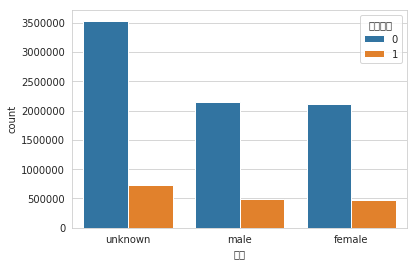

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('whitegrid')

sns.countplot(x='性别', hue='是否回答', data=train)

In [5]:
import pandas as pd

# 导入数据
user_info = pd.read_csv('member_info_0926.txt', header=None, sep='\t')
question_info = pd.read_csv('question_info_0926.txt', header=None, sep='\t')
train = pd.read_csv('invite_info_0926.txt', header=None, sep='\t')
test = pd.read_csv('invite_info_evaluate_1_0926.txt', header=None, sep='\t')

user_info.columns = ['用户id','性别','创作关键词','创作数量等级','创作热度等级','注册类型','注册平台','访问评率','用户二分类特征a','用户二分类特征b','用户二分类特征c','用户二分类特征d','用户二分类特征e',\
                     '用户多分类特征a','用户多分类特征b','用户多分类特征c','用户多分类特征d','用户多分类特征e','盐值','关注话题','感兴趣话题']
user_info = user_info.drop(['创作关键词', '创作数量等级', '创作热度等级', '注册类型', '注册平台'],
                           axis=1)

question_info.columns = [
    '问题id', '问题创建时间', '问题标题单字编码', '问题标题切词编码', '问题描述单字编码', '问题描述切词编码', '问题绑定话题'
]

train.columns = ['问题id', '用户id', '邀请创建时间', '是否回答']
train = pd.merge(train, user_info, how='left', on='用户id')
train = pd.merge(train, question_info, how='left', on='问题id')

test.columns = ['问题id', '用户id', '邀请创建时间']
test = pd.merge(test, user_info, how='left', on='用户id')
test = pd.merge(test, question_info, how='left', on='问题id')

# 数据合并
data = pd.concat([train, test], axis=0, sort=True)

# 用于保存提交结果
result_append = data[['问题id', '用户id', '邀请创建时间']][train.shape[0]:]

data['邀请创建时间-day'] = data['邀请创建时间'].apply(
    lambda x: x.split('-')[0].split('D')[1])
data['邀请创建时间-hour'] = data['邀请创建时间'].apply(
    lambda x: x.split('-')[1].split('H')[1])

data['问题创建时间-day'] = data['问题创建时间'].apply(
    lambda x: x.split('-')[0].split('D')[1])
data['问题创建时间-hour'] = data['问题创建时间'].apply(
    lambda x: x.split('-')[1].split('H')[1])

# 删除的特征并非不重要，相反这部分的数据很重要，如何处理这部分特征有很大的发挥空间，本baseline不涉及这些特征。
#drop_feat = ['问题标题单字编码','问题标题切词编码','问题描述单字编码','问题描述切词编码','问题绑定话题', '关注话题','感兴趣话题','问题创建时间','邀请创建时间']
#data  = data.drop(drop_feat, axis=1)

print(data.columns)

Index(['关注话题', '性别', '感兴趣话题', '是否回答', '用户id', '用户二分类特征a', '用户二分类特征b',
       '用户二分类特征c', '用户二分类特征d', '用户二分类特征e', '用户多分类特征a', '用户多分类特征b', '用户多分类特征c',
       '用户多分类特征d', '用户多分类特征e', '盐值', '访问评率', '邀请创建时间', '问题id', '问题创建时间',
       '问题描述切词编码', '问题描述单字编码', '问题标题切词编码', '问题标题单字编码', '问题绑定话题', '邀请创建时间-day',
       '邀请创建时间-hour', '问题创建时间-day', '问题创建时间-hour'],
      dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder
class_feat = [
    '用户id', '问题id', '性别', '访问评率', '用户多分类特征a', '用户多分类特征b', '用户多分类特征c',
    '用户多分类特征d', '用户多分类特征e'
]
encoder = LabelEncoder()
for feat in class_feat:
    encoder.fit(data[feat])
    data[feat] = encoder.transform(data[feat])

In [21]:
data.tail()

,topic_gz,gender,topic_int,label,id_memb,a1,b1,c1,d1,e1,a2,b2,c2,d2,e2,score_yx,freq,t_invi,id_quest,t_quest,desc_quest_w,desc_quest_sw,desc_tit_w,desc_tit_sw,topic_quest,d_invi,h_invi,d_quest,h_quest
1141678,T20,2,"T37:1.221637,T8:1.0082791,T1475:1.0072281,T29:...",NaN,370469,0,1,0,0,0,1330,170,77,657,1,362,4,D3869-H20,66910,D3869-H20,-1,-1,"W4084,W188,W9690,W1234","SW153,SW662,SW1473,SW599,SW90,SW24,SW693,SW128...",T727,3869,20,3869,20
1141679,-1,2,-1,NaN,783227,1,0,0,0,0,1092,115,113,657,1,308,1,D3872-H21,20657,D3872-H20,-1,-1,"W7437,W689,W71889,W374,W2023,W11487,W710,W7703","SW304,SW402,SW234,SW14,SW1809,SW402,SW234,SW14...","T5132,T2831",3872,21,3872,20
1141680,"T128,T9570",2,"T172:1.3079174,T1910:1.1930611,T93:0.93474734,...",NaN,320313,1,0,0,0,0,167,125,294,657,1,379,0,D3871-H15,695453,D3870-H12,"W403,W2051,W38340","SW37,SW16,SW37,SW94,SW27,SW503,SW25,SW328,SW1,...","W973,W38340","SW129,SW105,SW18,SW23,SW5,SW765,SW271,SW53,SW7...",T9570,3871,15,3870,12
1141681,"T129,T38,T61",2,T16:0.736231,NaN,945999,0,1,0,0,0,1092,115,6,1192,1,369,4,D3871-H8,1009533,D3871-H0,"W22564,W41704,W1433,W799,W17575,W5745,W20330,W...","SW168,SW118,SW7,SW140,SW339,SW185,SW254,SW19,S...","W1072,W11709,W7011,W15073,W1772,W5089","SW385,SW431,SW1582,SW1,SW1160,SW241,SW1810,SW1...","T8444,T11184",3871,8,3871,0
1141682,"T610,T17417,T16567,T692,T7720,T10876,T2253,T51...",1,"T6856:1.5414776,T10200:1.5020918,T14998:1.4819...",NaN,796878,1,0,0,0,0,1092,115,6,980,1,623,0,D3873-H9,446321,D3873-H9,-1,-1,"W6198,W6222,W1298,W3327","SW2650,SW940,SW110,SW1180,SW1,SW242,SW1056,SW1...","T4597,T5196",3873,9,3873,9


In [13]:
columns_n=['topic_gz','gender','topic_int','label','id_memb','a1','b1','c1','d1','e1','a2','b2','c2','d2','e2',\
           'score_yx','freq','t_invi','id_quest','t_quest','desc_quest_w','desc_quest_sw','desc_tit_w','desc_tit_sw',\
          'topic_quest','d_invi','h_invi','d_quest','h_quest']
print(len(columns_n), len(data.columns))

29 29


In [14]:
data.columns = columns_n

In [18]:
data.head()

,topic_gz,gender,topic_int,label,id_memb,a1,b1,c1,d1,e1,a2,b2,c2,d2,e2,score_yx,freq,t_invi,id_quest,t_quest,desc_quest_w,desc_quest_sw,desc_tit_w,desc_tit_sw,topic_quest,d_invi,h_invi,d_quest,h_quest
0,"T1727,T5310,T3402,T916,T1506,T26329,T7293,T180...",2,"T2794:1.1527717,T9701:0.94830835,T9533:0.85710...",0.0,1107636,0,1,0,0,0,1917,170,244,799,1,297,4,D3865-H22,327358,D3861-H23,"W3828,W14870,W3037,W2450,W692,W1688,W53547,W24...","SW7,SW5,SW670,SW951,SW328,SW635,SW209,SW242,SW...","W11058,W272,W2202,W431,W951,W243,W3828,W3037,W263","SW964,SW922,SW66,SW159,SW753,SW558,SW412,SW201...","T456,T112,T9566,T5310",3865,22,3861,23
1,"T42595,T3,T8520,T597,T6485,T6212,T25664,T148,T...",2,"T1470:1.4682752,T235:1.4412646,T4692:1.3516154...",0.0,879057,1,0,0,0,0,1092,115,249,657,0,308,1,D3844-H11,154388,D3823-H20,"W429,W2709,W1465,W6965","SW25,SW118,SW159,SW242,SW614,SW31,SW17,SW8,SW2...","W149,W79,W5210,W22869","SW242,SW258,SW58,SW8,SW2033,SW138,SW389,SW122,...","T2,T3095",3844,11,3823,20
2,"T610,T448,T61,T2801,T9019,T65,T233,T190,T55,T5...",2,"T13383:1.4091244,T1955:1.385072,T8943:1.314409...",0.0,483320,1,0,0,0,0,1380,206,0,440,1,415,4,D3862-H15,972853,D3861-H15,"W3046,W221,W3440,W730,W31489,W9218,W1278,W415","SW87,SW310,SW121,SW881,SW1875,SW242,SW1631,SW8...","W31489,W9218,W3440,W243","SW1631,SW852,SW972,SW1690,SW881,SW1875,SW1133,...","T6090,T2156,T97,T456",3862,15,3861,15
3,"T5,T33331,T2274,T31,T245,T516,T309,T1326,T119,...",2,"T671:1.4648209,T3772:1.2451016,T974:1.2110636,...",0.0,226818,1,0,0,1,0,1092,115,244,799,1,305,0,D3849-H11,379015,D3847-H22,-1,-1,"W973,W64958,W8583,W2269,W628,W565,W2200,W590,W483","SW129,SW105,SW636,SW777,SW388,SW1622,SW223,SW6...",T856,3849,11,3847,22
4,-1,2,"T4876:1.1308655,T2467:0.9645766,T245:0.9475922...",0.0,934744,1,0,0,0,0,506,204,175,705,1,296,1,D3867-H4,405239,D3847-H15,-1,-1,"W554,W28208,W396,W51","SW284,SW242,SW16,SW430,SW2,SW282,SW242,SW21,SW...","T26,T76,T17",3867,4,3847,15


In [37]:
for feat in [
        'id_memb', 'id_quest', 'gender', 'freq', 'a1', 'b1', 'c1', 'd1', 'e1',
        'a2', 'b2', 'c2', 'd2', 'e2'
]:
    col_name = '{}_count'.format(feat)
    data[col_name] = data[feat].map(data[feat].value_counts().astype(int))
    data.loc[data[col_name] < 2, feat] = -1
    data[feat] += 1
    data[col_name] = data[feat].map(data[feat].value_counts().astype(int))
    data[col_name] = (data[col_name] - data[col_name].min()) / (
        data[col_name].max() - data[col_name].min())

In [38]:
print(data.columns)
data.head()

Index(['gender', 'label', 'id_memb', 'a1', 'b1', 'c1', 'd1', 'e1', 'a2', 'b2',
       'c2', 'd2', 'e2', 'score_yx', 'freq', 'id_quest', 'd_invi', 'h_invi',
       'd_quest', 'h_quest', 'id_memb_count', 'id_quest_count', 'gender_count',
       'freq_count', 'a1_count', 'b1_count', 'c1_count', 'd1_count',
       'e1_count', 'a2_count', 'b2_count', 'c2_count', 'd2_count', 'e2_count'],
      dtype='object')


,gender,label,id_memb,a1,b1,c1,d1,e1,a2,b2,c2,d2,e2,score_yx,freq,id_quest,d_invi,h_invi,d_quest,h_quest,id_memb_count,id_quest_count,gender_count,freq_count,a1_count,b1_count,c1_count,d1_count,e1_count,a2_count,b2_count,c2_count,d2_count,e2_count
0,3,0.0,1107637,1,2,1,1,1,1918,171,245,800,2,297,5,327359,3865,22,3861,23,0.000013,0.000242,1.0,0.934679,0.0,0.0,1.0,1.0,1.0,0.021611,0.372573,0.211954,0.062069,1.0
1,3,0.0,879058,2,1,1,1,1,1093,116,250,658,1,308,2,154389,3844,11,3823,20,0.000026,0.000077,1.0,0.245990,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,0.503849,1.000000,0.0
2,3,0.0,483321,2,1,1,1,1,1381,207,1,441,2,415,5,972854,3862,15,3861,15,0.000053,0.000024,1.0,0.934679,1.0,1.0,1.0,1.0,1.0,0.024593,0.111223,0.432284,0.002828,1.0
3,3,0.0,226819,2,1,1,2,1,1093,116,245,800,2,305,1,379016,3849,11,3847,22,0.000022,0.000035,1.0,1.000000,1.0,1.0,1.0,0.0,1.0,1.000000,1.000000,0.211954,0.062069,1.0
4,3,0.0,934745,2,1,1,1,1,507,205,176,706,2,296,2,405240,3867,4,3847,15,0.000035,0.001778,1.0,0.245990,1.0,1.0,1.0,1.0,1.0,0.006180,0.033523,0.397650,0.044792,1.0


In [25]:
data=data.drop(['topic_gz','topic_int','t_invi','t_quest','desc_quest_w','desc_quest_sw','desc_tit_w','desc_tit_sw',\
                'a1','a2','b1','b2','c1','c2','d1','d2','e1','e2','id_memb','id_quest','gender', 'freq',
                'topic_quest'],axis=1)

In [41]:
data = data.drop([
    'a1', 'a2', 'b1', 'b2', 'c1', 'c2', 'd1', 'd2', 'e1', 'e2', 'id_memb',
    'id_quest', 'gender', 'freq'
],
                 axis=1)

In [43]:
data.columns

Index(['label', 'score_yx', 'd_invi', 'h_invi', 'd_quest', 'h_quest',
       'id_memb_count', 'id_quest_count', 'gender_count', 'freq_count',
       'a1_count', 'b1_count', 'c1_count', 'd1_count', 'e1_count', 'a2_count',
       'b2_count', 'c2_count', 'd2_count', 'e2_count'],
      dtype='object')

In [44]:
from lightgbm import LGBMClassifier
# 划分训练集和测试集
y_train = data[:train.shape[0]]['label'].values
X_train = data[:train.shape[0]].drop(['label'], axis=1).values

X_test = data[train.shape[0]:].drop(['label'], axis=1).values

model_lgb = LGBMClassifier(boosting_type='gbdt',
                           num_leaves=64,
                           learning_rate=0.01,
                           n_estimators=2000,
                           max_bin=425,
                           subsample_for_bin=50000,
                           objective='binary',
                           min_split_gain=0,
                           min_child_weight=5,
                           min_child_samples=10,
                           subsample=0.8,
                           subsample_freq=1,
                           colsample_bytree=1,
                           reg_alpha=3,
                           reg_lambda=5,
                           seed=1000,
                           n_jobs=-1,
                           silent=True)
# 建议使用CV的方式训练预测。
model_lgb.fit(X_train,
              y_train,
              eval_names=['train'],
              eval_metric=['logloss', 'auc'],
              eval_set=[(X_train, y_train)],
              early_stopping_rounds=10)
y_pred = model_lgb.predict_proba(X_test)[:, 1]
result_append['label'] = y_pred
result_append.to_csv('result.txt', index=False, header=False, sep='\t')

[1]	train's auc: 0.739291	train's binary_logloss: 0.466173
Training until validation scores don't improve for 10 rounds
[2]	train's auc: 0.740338	train's binary_logloss: 0.465024
[3]	train's auc: 0.740589	train's binary_logloss: 0.463903
[4]	train's auc: 0.746303	train's binary_logloss: 0.462805
[5]	train's auc: 0.748598	train's binary_logloss: 0.461741
[6]	train's auc: 0.749299	train's binary_logloss: 0.460705
[7]	train's auc: 0.749419	train's binary_logloss: 0.459695
[8]	train's auc: 0.749559	train's binary_logloss: 0.458708
[9]	train's auc: 0.749933	train's binary_logloss: 0.457734
[10]	train's auc: 0.75026	train's binary_logloss: 0.456786
[11]	train's auc: 0.750442	train's binary_logloss: 0.45586
[12]	train's auc: 0.75053	train's binary_logloss: 0.454952
[13]	train's auc: 0.750655	train's binary_logloss: 0.454071
[14]	train's auc: 0.750982	train's binary_logloss: 0.453202
[15]	train's auc: 0.750978	train's binary_logloss: 0.452354
[16]	train's auc: 0.750983	train's binary_logloss: 

KeyboardInterrupt: 